# Recurrent Neural Network (RNN)
### Goal of lesson
- Understand Recurrent Neural Network (RNN)
- Build a RNN on a timeseries
- Hover over the theory of RNN (LSTM cells)
- Use the MinMaxScaler from sklearn.
- Create a RNN model with tensorflow
- Applying the Dropout techniques.
- Predict stock prices and make weather forecast using RNN.

### Feed-Forward Neural Network
- Neural network that has connection only in one direction

### Recurrent Neural Network
- Neural network that generates output that feeds back into its own inputs
- Can do one-to-many and many-to-many relationship (not possible for feed-forward neural networks)
- This can generate sentences (while feed-forward neural network can only generate "words" or fixed sets of outputs)
- For time series

![RNN](img/rnn.png)

### Examples Recurrent Neural Network
- Google translate
- Voice recognition
- Video copy right violation

### Theory
- It is complex - and luckily - not needed to understand in depth
- Quote of the author of Keras (Francios Chollet):
    - "*You don't need to understand everything about the specific architecutre of an LSTM cell [...] just that LSTM cell is meant to allow past information to be reinjected at a later time.*"

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**tensorflow**](https://www.tensorflow.org) - end-to-end open source machine learning platform
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - [**MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) Transform features by scaling each feature to a given range
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Dense**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) regular densely-connected Neural Network (NN) layer.
>     - [**Dropout**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) applies Dropout to the input
>     - [**LSTM**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) Long Short-Term Memory layer - Hochreiter 1997

In [1]:
# rnn : neural network that generates output that feeds back into its own input.
# recurrent, iterations of the same data

# many-to-many relationship

# data gets re-injected

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('files/aapl.csv', parse_dates=True, index_col=0)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728291
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.762789


In [4]:
data_train = data.loc['2000':'2019', 'Adj Close'].to_numpy()
data_test = data.loc['2020', 'Adj Close'].to_numpy()

In [5]:
# normalize the data with MinMaxScaler
# data_test would be scaled accordingly to the data_train.
scaler = MinMaxScaler()
data_train = scaler.fit_transform(data_train.reshape(-1, 1)) # reshape to one entry per row
data_test = scaler.transform(data_test.reshape(-1, 1)) # we've fitted already by using fit_transform(). So we can just transform without fitting.

In [6]:

# wtd : take a history of data and then we want to predict the next price.
# so we take the price for in a size of 40,
# and then we take the label to be the next value.
# so we want to predict the next value.


In [7]:
def data_preparation(data):
    x = []
    y = []
    
    for i in range(40, len(data)):
        x.append(data[i-40:i, 0])
        y.append(data[i])
        
    x = np.array(x)
    y = np.array(y)
    
    x = x.reshape(x.shape[0], x.shape[1], 1)
    
    return x, y

In [8]:
x_train, y_train = data_preparation(data_train)

In [9]:
x_train.shape, y_train.shape

((4991, 40, 1), (4991, 1))

In [10]:
x_test, y_test = data_preparation(data_test)

In [11]:
# idea: return_sequence=True 
# it means we can feedback in it. so it can return the data inside here.
model = Sequential()
model.add(LSTM(units=45, return_sequences=True,
              input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=45, return_sequences=True))
model.add(LSTM(units=45))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error',
             metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
156/156 [==============================] - 8s 23ms/step - loss: 0.0035 - accuracy: 4.0072e-04
Epoch 2/5
156/156 [==============================] - 4s 23ms/step - loss: 2.4945e-04 - accuracy: 4.0072e-04
Epoch 3/5
156/156 [==============================] - 4s 23ms/step - loss: 2.5558e-04 - accuracy: 4.0072e-04
Epoch 4/5
156/156 [==============================] - 4s 23ms/step - loss: 1.6772e-04 - accuracy: 4.0072e-04
Epoch 5/5
156/156 [==============================] - 4s 23ms/step - loss: 1.6640e-04 - accuracy: 4.0072e-04


In [13]:
y_pred = model.predict(x_test)

7/7 [==============================] - 1s 8ms/step


In [14]:
y_pred.shape # dimension
# 213 : the number of trading days in a year.

(213, 1)

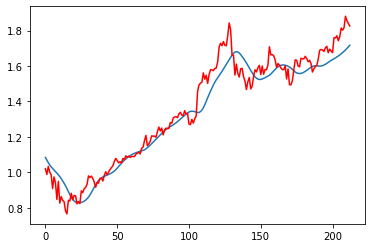

In [15]:
fig, ax = plt.subplots()
ax.plot(y_pred)
ax.plot(y_test, c='r')

# the red is the real price.
# real price is way more going up and down.
# our prediction is not good.

# the intervals here are not the prices. 
# you can transform that back.

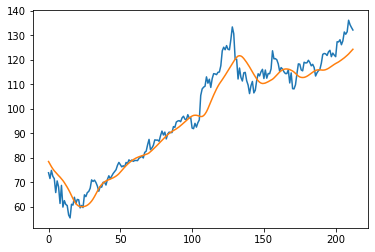

In [17]:
# transform it back with inverse_trasnform()
y_unscaled = scaler.inverse_transform(y_pred) # now you've got the real values.

fig, ax = plt.subplots()
y_real = data.loc['2020', 'Adj Close'].to_numpy()

ax.plot(y_real[40:])
ax.plot(y_unscaled)

# fig 해설
# it seems this is the exact same chart.
# but the difference is here we have prices in us dollars.

# x-axis: the day numbers